In [ ]:
import re
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CARICAMENTO DATI
df = pd.read_csv('csv/FULL_DATA1.csv')  
countries = list(df['country'].unique())
countries.append('United States of America')  # Aggiunta manuale
print(countries)

# CONFIGURAZIONE BROWSER (headless)
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--window-size=1920x1080")

# AVVIO DEL DRIVER CON webdriver-manager
from selenium.webdriver.chrome.service import Service
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# RACCOLTA DATI
results = []

for count in countries:
    display_country = count
    if count == "Vietnam": 
        country = "Viet Nam"  # perchè è scritto in modo diverso nei diversi dati
    elif count == "Czech Republic":
        country = "Czechia"
    else:
        country = count

    slug = country.lower().replace(" ", "_")
    url = f"https://napoleoncat.com/stats/facebook-users-in-{slug}/2021/05/"
    driver.get(url)
    time.sleep(4)  
    
    try:
        # Cerca e clicca il pulsante per accettare i cookies se presente
        try:
            cookie_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, "//button[contains(., 'Allow all') or contains(., 'Accetta tutto') or contains(., 'Accept all')]"))
            )
            cookie_button.click()
            time.sleep(2)  # Attendi dopo aver cliccato i cookies
        except:
            pass  # Se non trova il bottone dei cookies, continua comunque
        
        # Aspetta che l'elemento con il numero di utenti sia visibile
        WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.XPATH, "//*[contains(text(), 'Facebook users in')]"))
        )
        
        # Ottieni il testo della pagina
        page_text = driver.find_element(By.TAG_NAME, "body").text

        # Usa espressioni regolari per estrarre i numeri
        penetration_match = re.search(r"which accounted for ([\d.]+)%", page_text)

        if penetration_match:
            penetration = penetration_match.group(1) 
        else:
            penetration = "N/A"

        results.append([display_country, penetration])
    except Exception as e:
        print(f"Errore per {country}: {e}")
        results.append([country, "Errore"])

driver.quit()

# SALVA IN CSV I DATI TROVATI
with open("csv/facebook_data_2021.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["country", "Percentage of the population that use Facebook 05-2021"])
    writer.writerows(results)

print("File CSV salvato come 'facebook_data_2021.csv'")

['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'India', 'Indonesia', 'Italy', 'Japan', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United Kingdom', 'Venezuela', 'Vietnam', 'United States of America']
File CSV salvato come 'facebook_data_2021.csv'


In [ ]:
#selenium
# CONFIGURAZIONE BROWSER (headless)
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--window-size=1920x1080")

# AVVIO DEL DRIVER CON webdriver-manager
from selenium.webdriver.chrome.service import Service
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# RACCOLTA DATI
results = []

for count in countries:
    display_country = count
    if count == "Vietnam": 
        country = "Viet Nam"  # perchè è scritto in modo diverso nei diversi dati
    elif count == "Czech Republic":
        country = "Czechia"
    else:
        country = count

    slug = country.lower().replace(" ", "_")
    url = f"https://napoleoncat.com/stats/facebook-users-in-{slug}/2022/06/"
    driver.get(url)
    time.sleep(4)  
    
    try:
        # Cerca e clicca il pulsante per accettare i cookies se presente
        try:
            cookie_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, "//button[contains(., 'Allow all') or contains(., 'Accetta tutto') or contains(., 'Accept all')]"))
            )
            cookie_button.click()
            time.sleep(2)  # Attendi dopo aver cliccato i cookies
        except:
            pass  # Se non trova il bottone dei cookies, continua comunque
        
        # Aspetta che l'elemento con il numero di utenti sia visibile
        WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.XPATH, "//*[contains(text(), 'Facebook users in')]"))
        )
        
        # Ottieni il testo della pagina
        page_text = driver.find_element(By.TAG_NAME, "body").text

        # Usa espressioni regolari per estrarre i numeri
        penetration_match = re.search(r"which accounted for ([\d.]+)%", page_text)

        if penetration_match:
            penetration = penetration_match.group(1) 
        else:
            penetration = "N/A"

        results.append([display_country, penetration])
    except Exception as e:
        print(f"Errore per {country}: {e}")
        results.append([country, "Errore"])

driver.quit()

df=pd.read_csv("csv/facebook_data_2021.csv")
results_df = pd.DataFrame(results, columns=["country", "percentage"])
df["Percentage of population that use Facebook 06-2022"]=results_df["percentage"]
df.to_csv("csv/facebook_data_2021.csv", index=False)

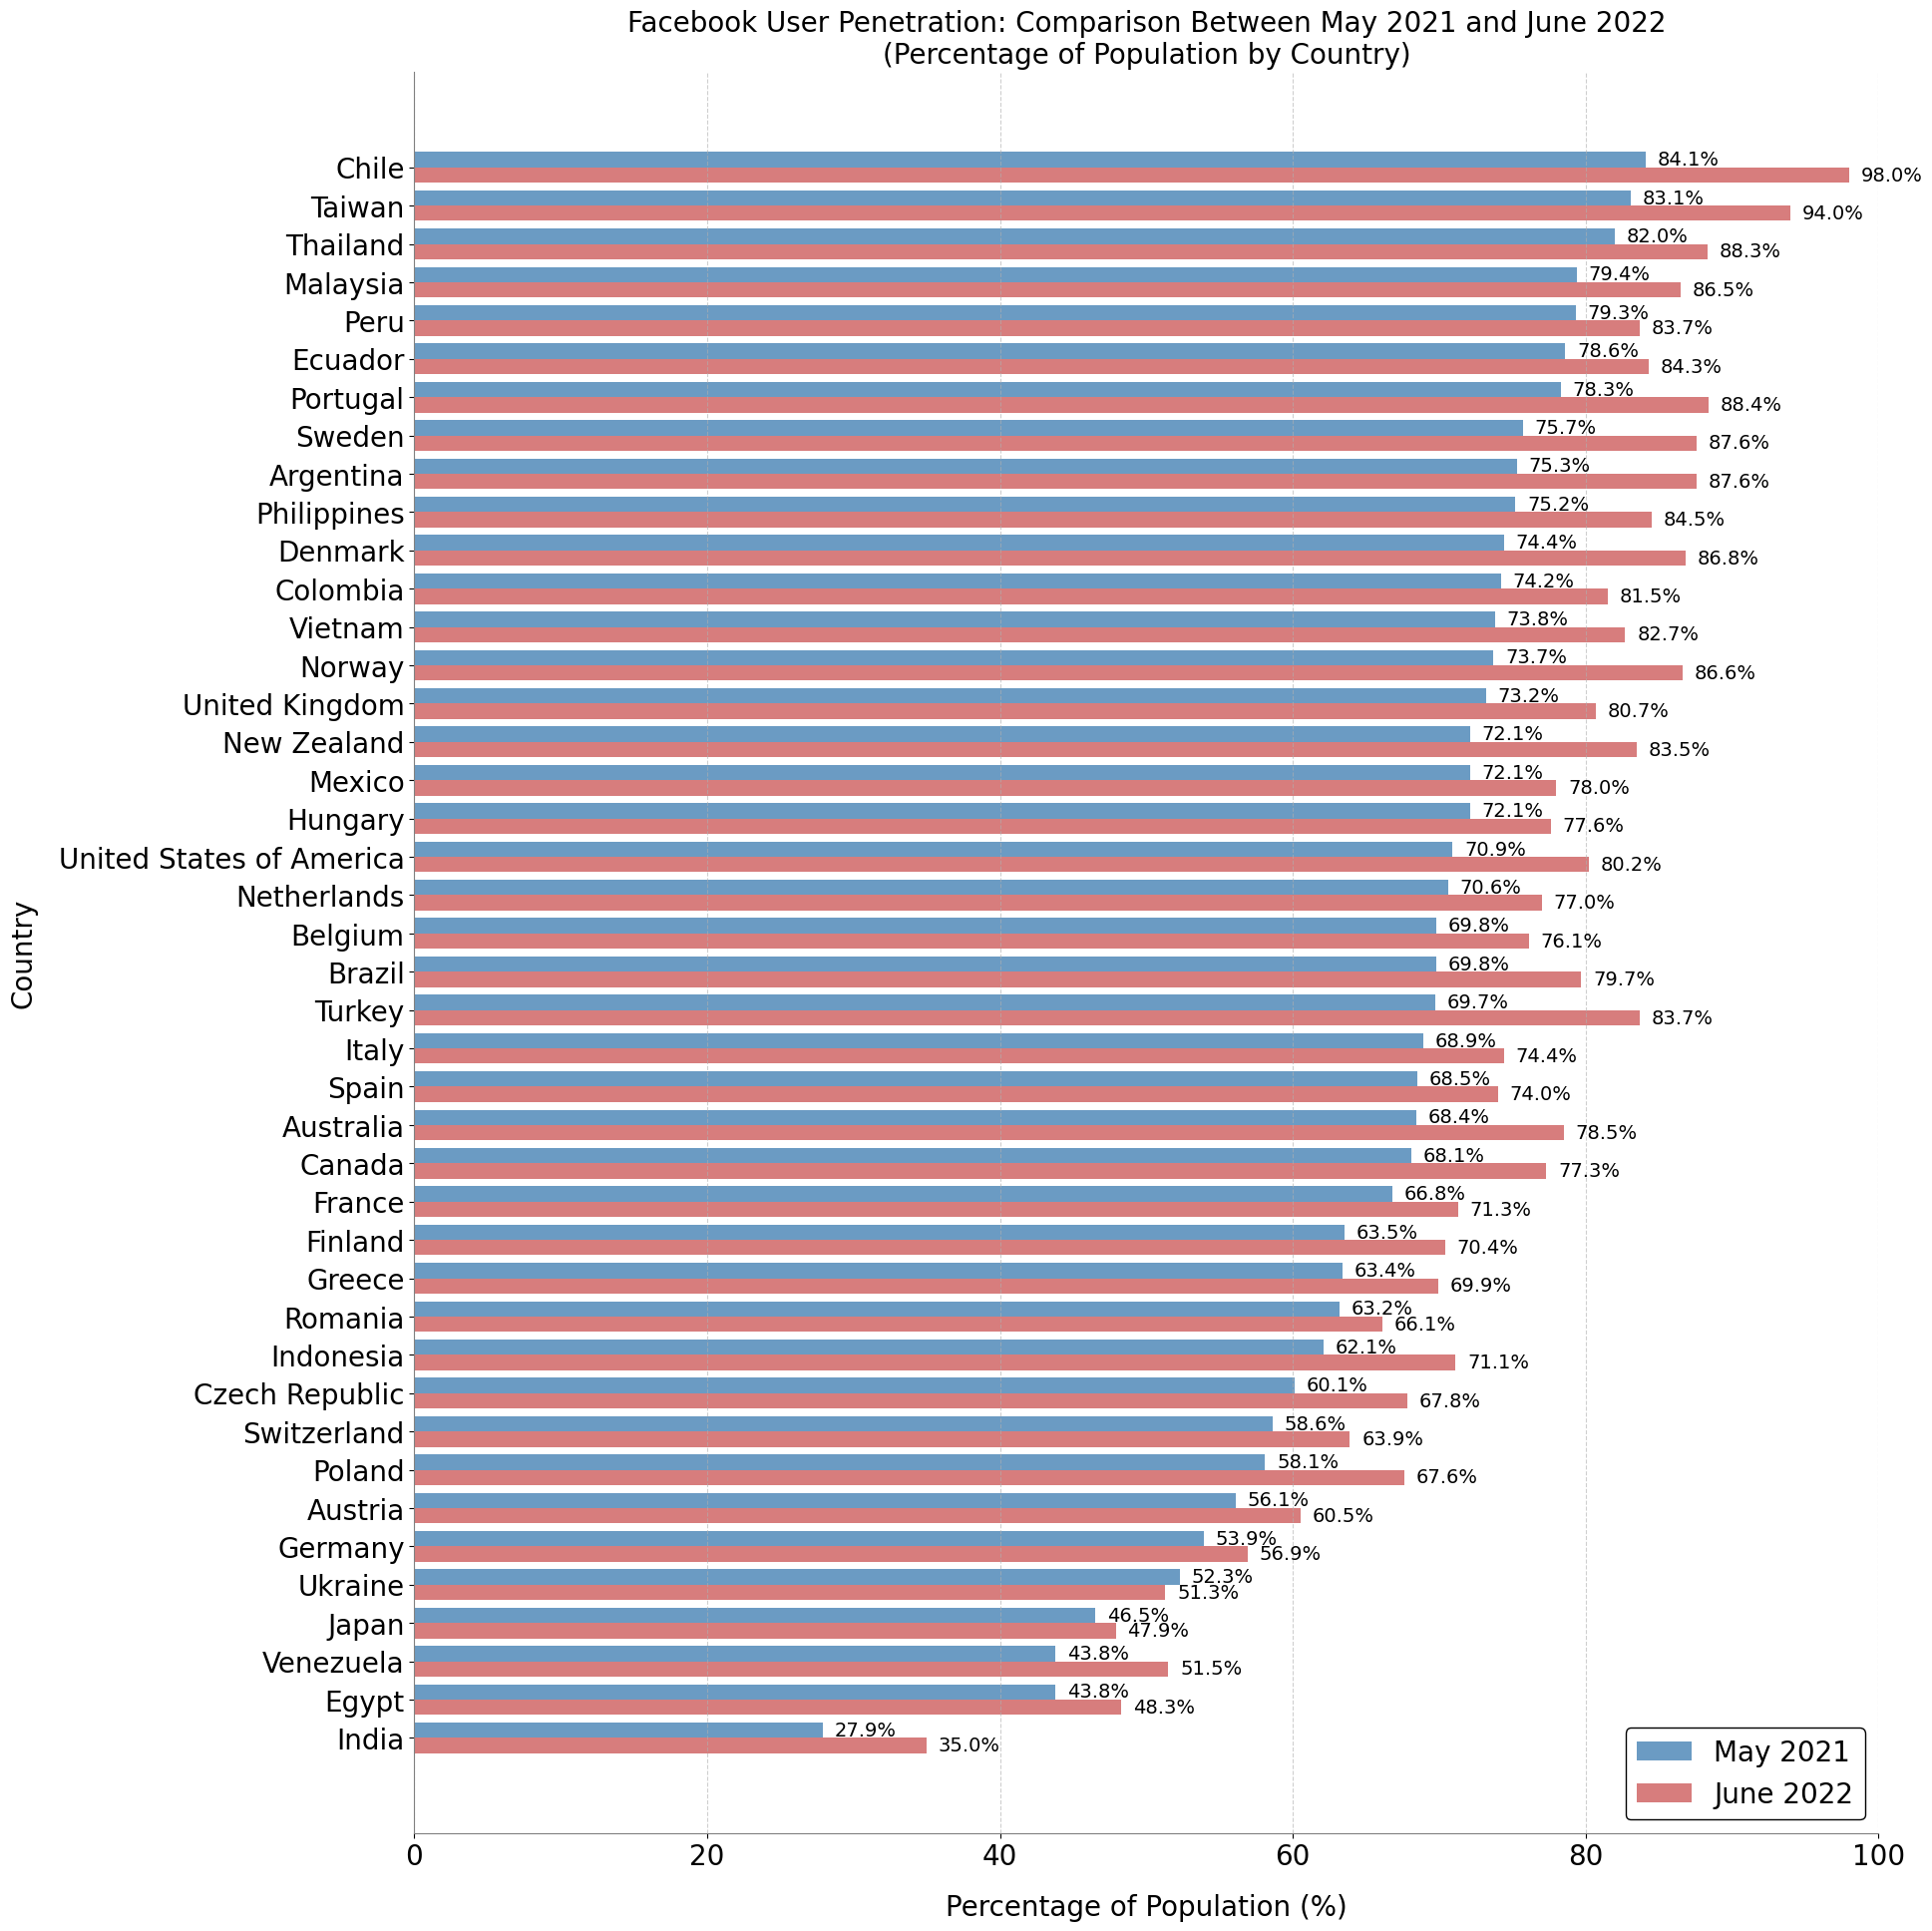

In [ ]:

df = pd.read_csv('csv/facebook_data_2021.csv') 
df['Percentage_2021'] = df['Percentage of the population that use Facebook 05-2021'].astype(float)
df['Percentage_2022'] = df['Percentage of population that use Facebook 06-2022'].astype(float)

df = df.sort_values(by='Percentage_2021', ascending=False)
# grafico
plt.figure(figsize=(20, 20))  
plt.rcParams['font.family'] = 'sans-serif' 
bar_height = 0.4
y_pos = np.arange(len(df["country"]))


# creazione barre
bars_2021 = plt.barh(y_pos - bar_height/2, df['Percentage_2021'], 
                    height=bar_height, color="steelblue", alpha=0.8, label='May 2021')

bars_2022 = plt.barh(y_pos + bar_height/2, df['Percentage_2022'], 
                    height=bar_height, color="indianred", alpha=0.8, label='June 2022')

# Aggiunta valori percentuali
for bars in [bars_2021, bars_2022]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.8, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', 
                va='center', 
                ha='left',
                fontsize=14)

# Configurazione assi e labels
ax = plt.gca()
ax.set_yticks(y_pos)
ax.set_yticklabels(df["country"])  
ax.invert_yaxis()  


plt.title("Facebook User Penetration: Comparison Between May 2021 and June 2022\n(Percentage of Population by Country)", 
          fontsize=20)
plt.xlabel("Percentage of Population (%)",fontsize=20, labelpad=16)
plt.ylabel("Country", fontsize=20, labelpad=15)


plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Legenda in basso a destra dentro il grafico
legend = plt.legend(fontsize=20, 
                   loc='lower right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black')
legend.get_frame().set_linewidth(1.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='both', which='major', labelsize=20)


plt.tight_layout(pad=3.0)
plt.show()

effettuo il filtraggio >40% da qui, non prima

In [ ]:
#elimino tutti i paesi con utilizzo inferiore a 40%
facebook_data = pd.read_csv("csv/facebook_data_2021.csv")
facebook_data = facebook_data[facebook_data["Percentage of the population that use Facebook 05-2021"] != "Errore"]
facebook_data["Percentage of the population that use Facebook 05-2021"] = facebook_data["Percentage of the population that use Facebook 05-2021"].astype(float)
low_usage_countries = facebook_data[facebook_data["Percentage of the population that use Facebook 05-2021"] < 40]["country"].tolist()

# Carica il file FULL_DATA2.csv
full_data = pd.read_csv("csv/FULL_DATA2.csv")
filtered_full_data = full_data[~full_data["country"].isin(low_usage_countries)]
filtered_full_data.to_csv("csv/FULL_DATA3.csv", index=False)